<a href="https://colab.research.google.com/github/ghoshal7/python_basics/blob/master/Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
pd.options.display.max_columns = None

In [111]:
downloaded = drive.CreateFile({'id':'1tBMjrZehHiOcQurOdwTxCepmByFWwFtQ'}) 
downloaded.GetContentFile('auto.csv')
df = pd.read_csv('auto.csv')
print('size = ', df.shape)
df.head()

size =  (392, 10)


,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,5,17.0,8,302.0,140,3449,10.5,70,1,ford torino


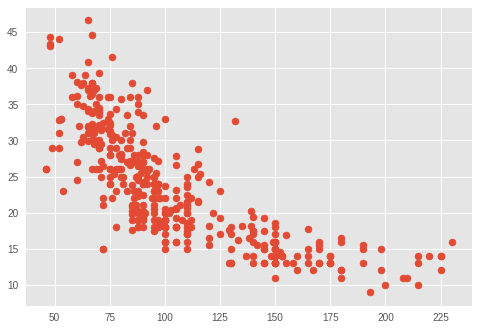

In [112]:
plt.scatter(df.horsepower, df.mpg)

# Simple Linear Regression

In [0]:
# prepare data
y = df.iloc[:,1].values

X = df.iloc[:,4].values
X = X.reshape(-1, 1)

In [0]:
# fit model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
print("Intercept:", lr.intercept_)

Intercept: 40.606097600118346


In [0]:
print("Co-efficient:",lr.coef_)

Co-efficient: [-0.16259724]


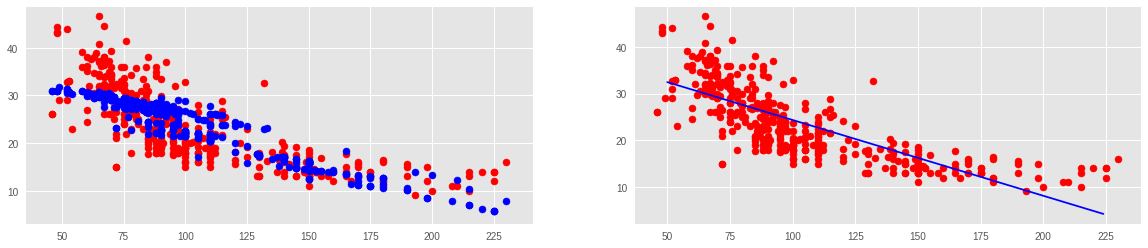

In [0]:
f, a = plt.subplots(1,2, figsize = (20,4))

a[0].scatter(X, y, color = 'red')
a[0].scatter(X, y_hat, color = 'blue')

a[1].scatter(X, y, color = 'red')
# get the line
x_plot = np.arange(50,225)
y_plot = [lr.intercept_ + i*lr.coef_ for i in x_plot]
a[1].plot(x_plot,y_plot, color = 'blue')

# Multiple Linear Regression

In [0]:
X = df[['horsepower', 'displacement']].values

In [0]:
# fit model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
print("Intercept:", lr.intercept_)

Intercept: 37.46948766803039


In [0]:
print("Co-efficient:",lr.coef_)

Co-efficient: [-0.05827533 -0.04081837]


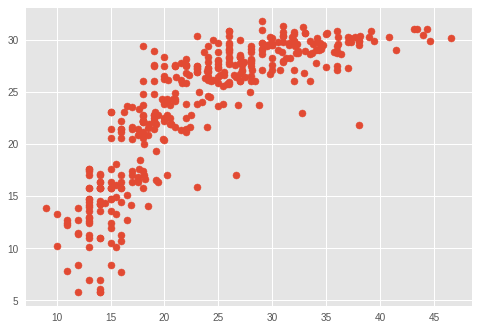

In [0]:
y_hat = lr.predict(X)

plt.scatter(y,y_hat)

# Train - Test

In [0]:
# split train - test
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [0]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
y_hat = lr.predict(X_test)

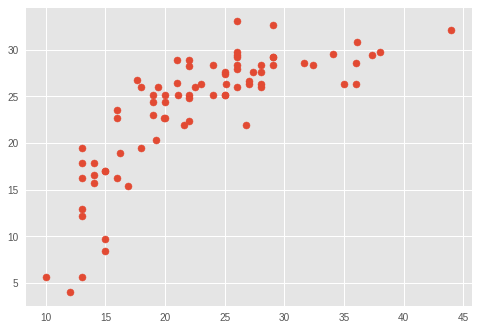

In [0]:
plt.scatter(y_test, y_hat)

# Metrics

In [0]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_hat)

22.153237123863413

In [0]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_hat)

3.782512710126959

In [0]:
from sklearn.metrics import r2_score

r2_score(y_test, y_hat)

0.5659681822256185

# Power of Python of R

In [0]:
texts = df.name

In [0]:
text_words = texts.str.split()

# print(text_words)

In [0]:
all_words = [i for i in text_words]

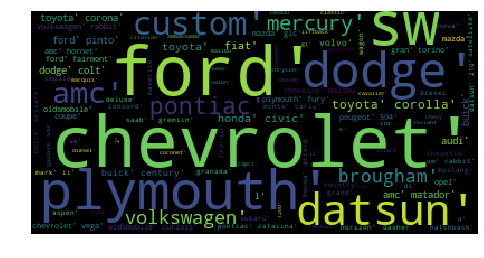

In [0]:
from collections import Counter
from wordcloud import WordCloud

word_counter = Counter(str(all_words))

wc = WordCloud(background_color = 'black', max_words = 1000)
wc.generate(str(all_words))
plt.imshow(wc)
plt.axis("off")
plt.show()

# Default Dataset

In [135]:
downloaded = drive.CreateFile({'id':'1n6mp53KWc_3CjoN6R844eDvXZqUqxdRD'}) 
downloaded.GetContentFile('default.csv')
df = pd.read_csv('default.csv')
print('size = ', df.shape)
df.head()

size =  (10000, 5)


,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


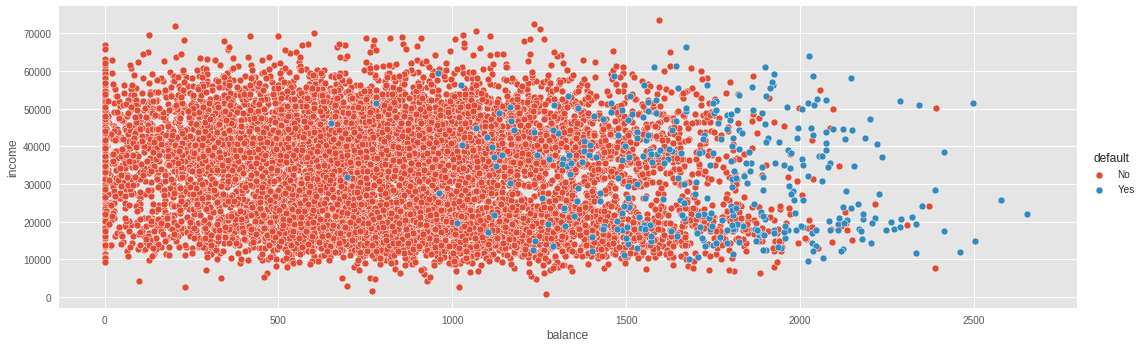

In [136]:
sb.pairplot(x_vars=["balance"], y_vars=["income"], data=df, hue="default", size=5, aspect = 3)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


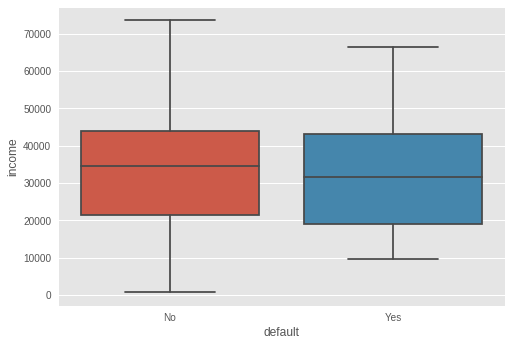

In [137]:
sb.boxplot(x = df.default, y = df.income, data = df)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


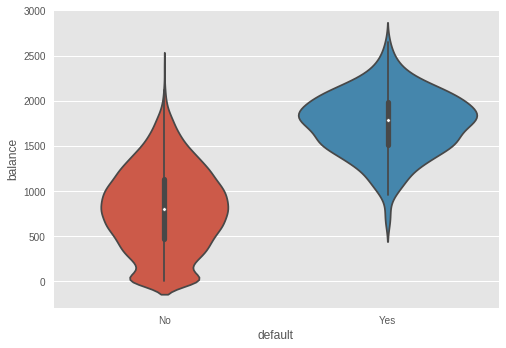

In [138]:
sb.violinplot(x = df.default, y = df.balance, data = df)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


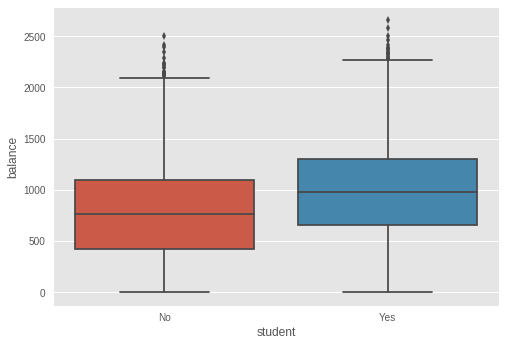

In [139]:
sb.boxplot(x = df.student, y = df.balance, data = df)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5, 1.0, 'Non students')

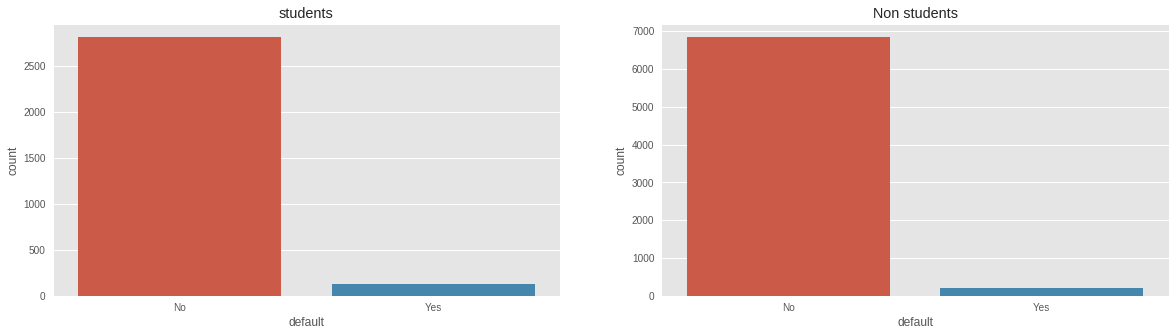

In [143]:
f, a = plt.subplots(1,2,figsize = (20,5))
sb.countplot(df[df.student == 'Yes'].default, ax = a[0]); a[0].set_title('students')
sb.countplot(df[df.student == 'No'].default, ax = a[1]); a[1].set_title('Non students')

In [146]:
pd.get_dummies(df).head()

,Unnamed: 0,balance,income,default_No,default_Yes,student_No,student_Yes
0,1,729.526495,44361.625074,1,0,1,0
1,2,817.180407,12106.134700,1,0,0,1
2,3,1073.549164,31767.138947,1,0,1,0
3,4,529.250605,35704.493935,1,0,1,0
4,5,785.655883,38463.495879,1,0,1,0


In [147]:
df.loc[df.default == 'No', 'target'] = 0
df.loc[df.default == 'Yes', 'target'] = 1

df.head()

,Unnamed: 0,default,student,balance,income,target
0,1,No,No,729.526495,44361.625074,0.0
1,2,No,Yes,817.180407,12106.134700,0.0
2,3,No,No,1073.549164,31767.138947,0.0
3,4,No,No,529.250605,35704.493935,0.0
4,5,No,No,785.655883,38463.495879,0.0


In [148]:
df.loc[df.student == 'No', 'student_num'] = 0
df.loc[df.student == 'Yes', 'student_num'] = 1

df.head()

,Unnamed: 0,default,student,balance,income,target,student_num
0,1,No,No,729.526495,44361.625074,0.0,0.0
1,2,No,Yes,817.180407,12106.134700,0.0,1.0
2,3,No,No,1073.549164,31767.138947,0.0,0.0
3,4,No,No,529.250605,35704.493935,0.0,0.0
4,5,No,No,785.655883,38463.495879,0.0,0.0


# Logistic regression

In [0]:
from sklearn.linear_model import LogisticRegression

logistic_reg = LogisticRegression()

In [0]:
y = df.target.values
X = df[['balance', 'income', 'student_num']]

In [0]:
# split train - test
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [160]:
logistic_reg.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [161]:
logistic_reg.intercept_

array([-1.8038716e-06])

In [162]:
logistic_reg.coef_

array([[ 4.43912646e-04, -1.28389031e-04, -2.29274128e-06]])

In [163]:
logistic_reg.score(X_test, y_test)

0.9655

In [164]:
logistic_reg.score(X_train, y_train)

0.966375

In [0]:
y_hat = logistic_reg.predict(X_test)

# On-going Kaggle Competitions

In [167]:
downloaded = drive.CreateFile({'id':'1Ez_0pQlab2cC_Os5jJst7CbfqboHuSx0'}) 
downloaded.GetContentFile('train.csv')
df_train = pd.read_csv('train.csv')
print('size = ', df_train.shape)
df_train.head()

size =  (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [195]:
downloaded = drive.CreateFile({'id':'1qQNSDgbxYEyE1Y9FDJnXcyOkbd8rCLa6'}) 
downloaded.GetContentFile('test.csv')
df_test = pd.read_csv('test.csv')
print('size = ', df_test.shape)
df_test.head()

InvalidConfigError: ignored

# EDA

In [175]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [170]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


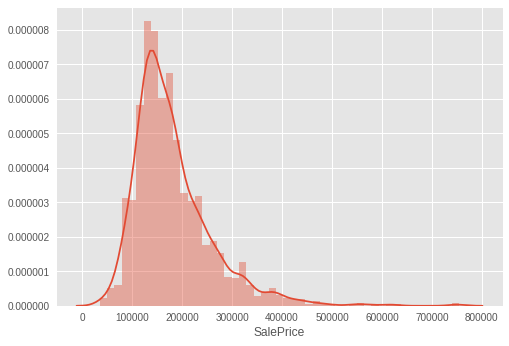

In [171]:
sb.distplot(df_train.SalePrice)

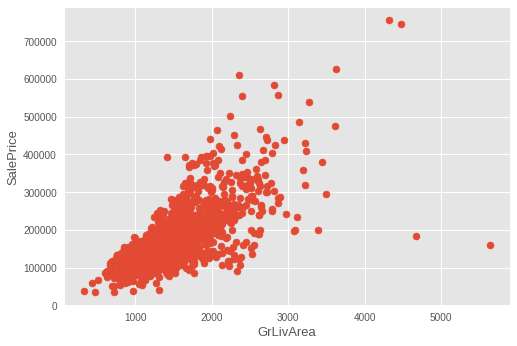

In [176]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['GrLivArea'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [0]:
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)

In [179]:
df_train_na = df_train.isnull().sum()*100/df_train.shape[0]
df_train_na.head()

Id              0.00000
MSSubClass      0.00000
MSZoning        0.00000
LotFrontage    17.76406
LotArea         0.00000
dtype: float64

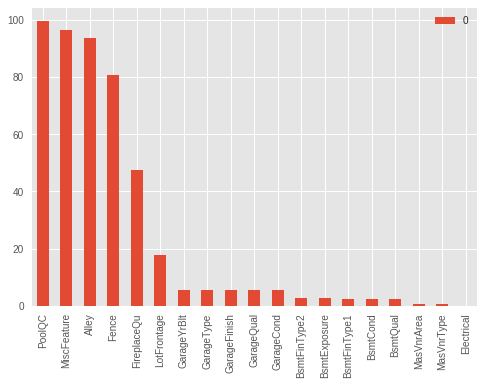

In [180]:
df_train_na = pd.DataFrame(df_train_na.drop(df_train_na[df_train_na == 0].index).sort_values(ascending=False)[:30])
df_train_na.plot(kind = 'bar')


In [194]:
df_train.dropna().shape

(1458, 80)

In [184]:
df_train.shape

(1458, 81)

In [0]:
# Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA
df_train = df_train.drop(['Utilities'], axis=1)

In [0]:
# PoolQC : data description says NA means "No Pool". That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general.
df_train['PoolQC'] = df_train["PoolQC"].fillna("None")

In [0]:
# MiscFeature : data description says NA means "no misc feature"
df_train["MiscFeature"] = df_train["MiscFeature"].fillna("None")

In [0]:
# Alley : data description says NA means "no alley access"
df_train["Alley"] = df_train["Alley"].fillna("None")


for i in ["Fence", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "MasVnrType"]:
  df_train[i] = df_train[i].fillna("None")
  
for i in ["GarageYrBlt","GarageArea","GarageCars", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "BsmtFullBath","BsmtHalfBath", "MasVnrArea"]:
  df_train[i] = df_train[i].fillna(0)

In [0]:
#LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , 
#we can fill in missing values by the median LotFrontage of the neighborhood.

df_train["LotFrontage"] = df_train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [0]:
# MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'
df_train['MSZoning'] = df_train['MSZoning'].fillna(df_train['MSZoning'].mode()[0])

#Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.
df_train['Electrical'] = df_train['Electrical'].fillna(df_train['Electrical'].mode()[0])

#KitchenQual: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.
df_train['KitchenQual'] = df_train['KitchenQual'].fillna(df_train['KitchenQual'].mode()[0])

# Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string
df_train['Exterior1st'] = df_train['Exterior1st'].fillna(df_train['Exterior1st'].mode()[0])
df_train['Exterior2nd'] = df_train['Exterior2nd'].fillna(df_train['Exterior2nd'].mode()[0])

#SaleType : Fill in again with most frequent which is "WD"
df_train['SaleType'] = df_train['SaleType'].fillna(df_train['SaleType'].mode()[0])

# MSSubClass : Na most likely means No building class. We can replace missing values with None
df_train['MSSubClass'] = df_train['MSSubClass'].fillna("None")

In [193]:
# Functional : data description says NA means typical
df_train["Functional"] = df_train["Functional"].fillna("Typ")

df_train.isnull().sum().sum()

0